# Project Design

Planing Project<ol>
    <li>**Module**<ol>
        <li>Libraries needed
        <li>Import</ol>
    <li>Data Preparation
    <li>Data Exploration
    <li>Data Modeling
    <li>Presentation and automation</ol>

# Libraries needed

**From**

`sklearn`

`keras`

**Import**

`pandas as pd`

`seaborn as sns`

`datetime`

`numpy as np`

`featurewiz as FW`

`preprocessing`

`LabelEncoder`

`StandardScaler`

`train_test_split`

`Dense, BatchNormalization, Dropout, LSTM`

`Sequential`

`to_categorical`

`Adam`

`regularizers`

`Precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score`

`callbacks`

`pythainlp`

# IMPORT

`Import Liraries`

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import featurewiz as FW
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed (0)

In [85]:
# A=[1,5,4]
# B=[2,6,7]
# C=[3,8,9]
# pd.DataFrame(np.array([A,B,C]), columns = ["A","B","C"])

# DATASET Hatyai city In Thailand

In [86]:
hy=pd.read_csv("C:/Users/TUF GAMING/Documents/GitHub/data-science-with-python-2022/Rain_Prediction/Rainfall_Hatyai.csv")
hy.head()

,Date,Date.1,MO,YEAR,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/1/2023,1.0,1.0,2021.0,Hatyai,24.34,27.35,0.6,NaN,NaN,...,17.52,85.50,100.51,100.40,8.0,NaN,25.56,27.40,No,No
1,2/1/2023,2.0,1.0,2021.0,Hatyai,24.22,26.87,0.0,NaN,NaN,...,17.33,86.19,100.57,100.48,NaN,NaN,26.33,28.03,No,No
2,3/1/2023,3.0,1.0,2021.0,Hatyai,24.43,27.33,0.0,NaN,NaN,...,18.13,88.62,100.60,100.50,NaN,2.0,26.88,28.46,No,No
3,4/1/2023,4.0,1.0,2021.0,Hatyai,24.49,27.44,0.0,NaN,NaN,...,18.55,90.69,100.59,100.47,NaN,NaN,27.30,28.65,No,No
4,5/1/2023,5.0,1.0,2021.0,Hatyai,24.55,28.02,1.0,NaN,NaN,...,19.04,90.88,100.54,100.40,7.0,8.0,27.35,28.64,No,No


In [87]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Date.1         365 non-null    float64
 2   MO             365 non-null    float64
 3   YEAR           365 non-null    float64
 4   Location       365 non-null    object 
 5   MinTemp        365 non-null    float64
 6   MaxTemp        365 non-null    float64
 7   Rainfall       363 non-null    float64
 8   Evaporation    0 non-null      float64
 9   Sunshine       0 non-null      float64
 10  WindGustDir    361 non-null    object 
 11  WindGustSpeed  361 non-null    float64
 12  WindDir9am     300 non-null    object 
 13  WindDir3pm     354 non-null    object 
 14  WindSpeed9am   365 non-null    float64
 15  WindSpeed3pm   365 non-null    float64
 16  Humidity9am    365 non-null    float64
 17  Humidity3pm    365 non-null    float64
 18  Pressure9a

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

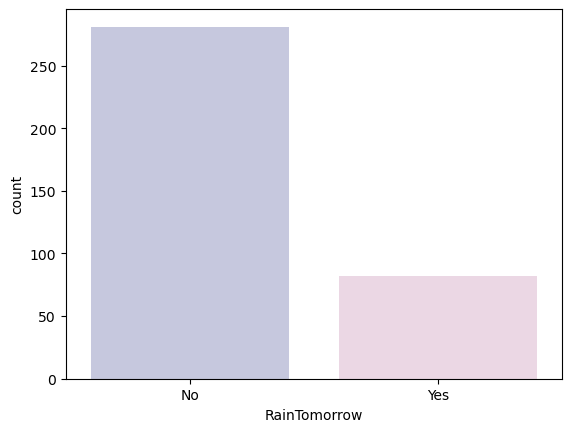

In [88]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= hy["RainTomorrow"], palette= cols)

<AxesSubplot:>

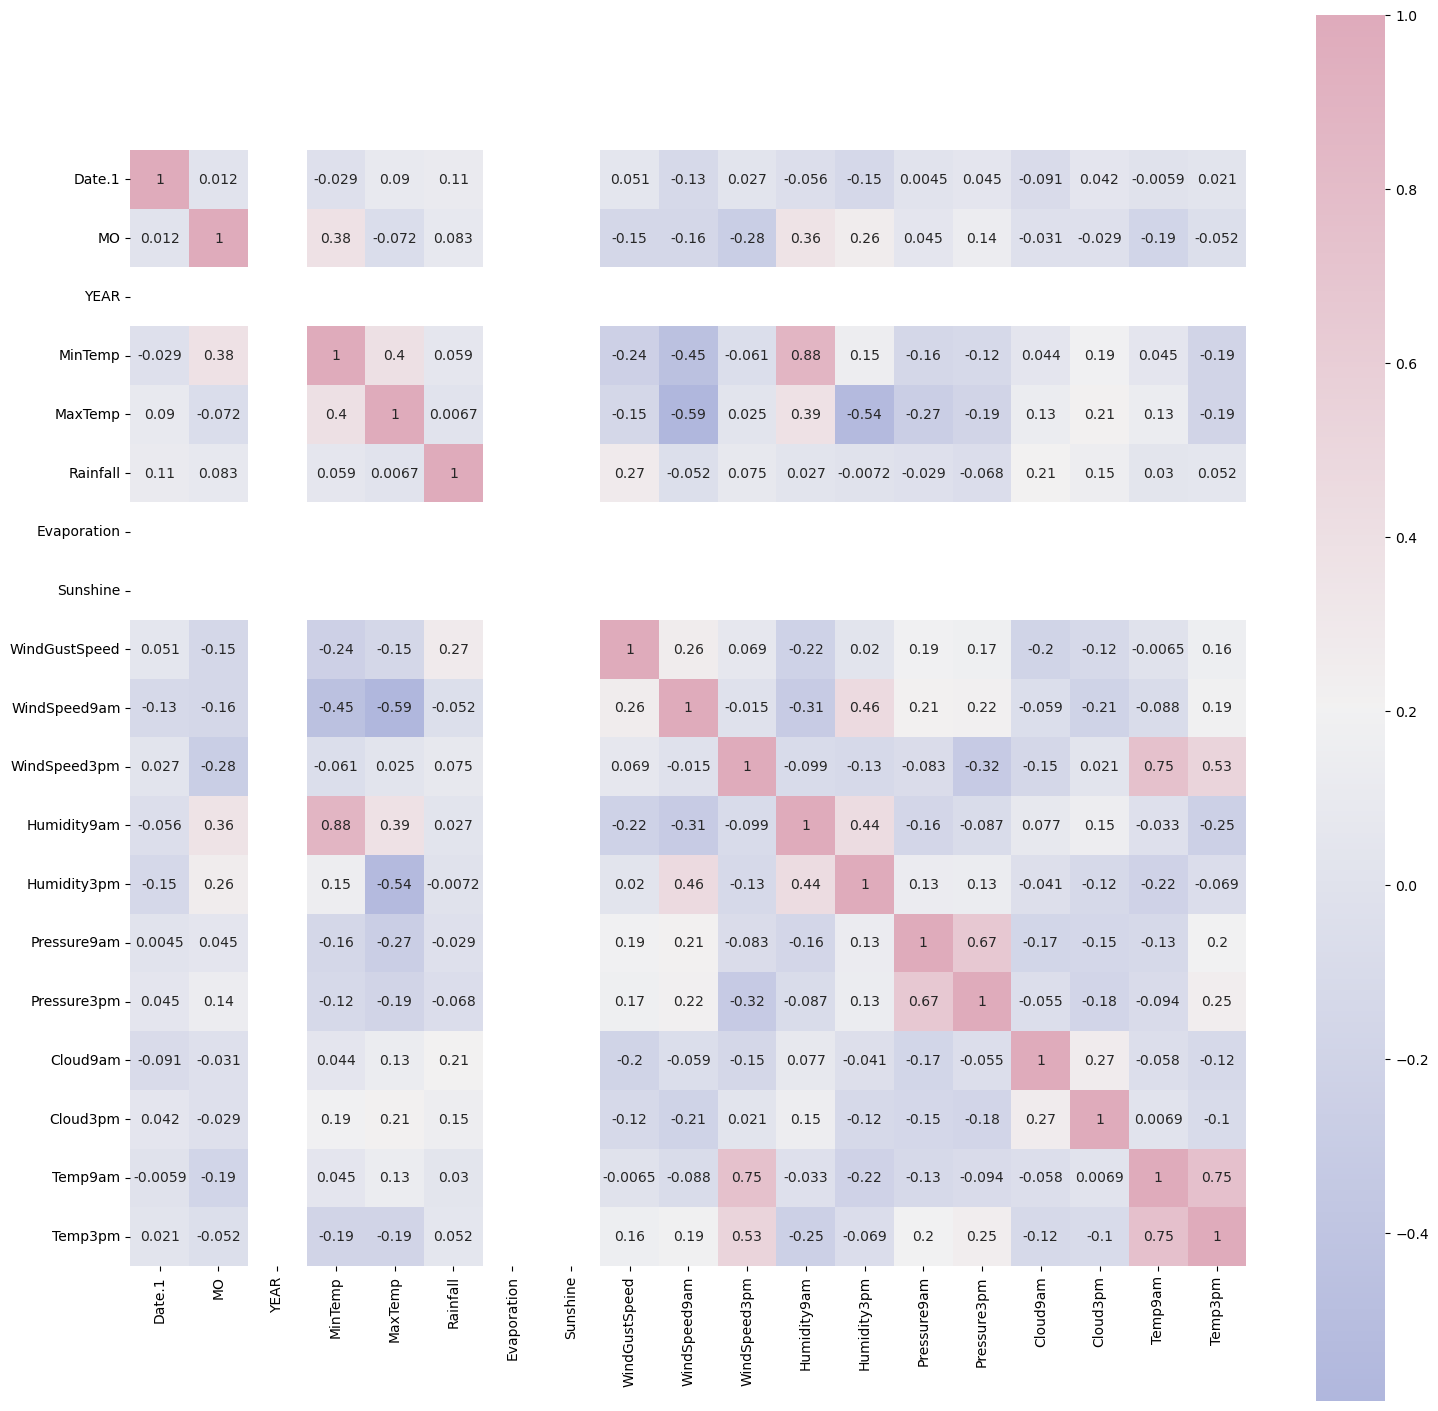

In [89]:
corrmat = hy.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6,as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap= cmap,annot=True, square=True)

In [90]:
lengths = hy["Date"].str.len()
lengths.value_counts()

9.0     219
8.0      81
10.0     65
Name: Date, dtype: int64

In [91]:
hy['Date']=pd.to_datetime(hy["Date"])
# Creating a collumn of year
hy['Year']=hy.Date.dt.year

# function to encode datetime into cyclic parameters.
# As I am planning to use this data in a nueral network I prefer the months and days in a cyclic continuos feature.

def encode(hy,col, max_val):
    hy[col + '_sin'] = np.sin(2 * np.pi * hy[col]/max_val)
    hy[col + '_cos'] = np.cos(2 * np.pi * hy[col]/max_val)
    return hy

hy['month'] = hy.Date.dt.month
hy = encode(hy, 'month', 12)

hy['day'] = hy.Date.dt.day
hy = encode(hy, 'day', 31)

hy.head()

,Date,Date.1,MO,YEAR,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Temp3pm,RainToday,RainTomorrow,Year,month,month_sin,month_cos,day,day_sin,day_cos
0,2023-01-01,1.0,1.0,2021.0,Hatyai,24.34,27.35,0.6,NaN,NaN,...,27.40,No,No,2023.0,1.0,0.500000,8.660254e-01,1.0,0.201299,0.97953
1,2023-02-01,2.0,1.0,2021.0,Hatyai,24.22,26.87,0.0,NaN,NaN,...,28.03,No,No,2023.0,2.0,0.866025,5.000000e-01,1.0,0.201299,0.97953
2,2023-03-01,3.0,1.0,2021.0,Hatyai,24.43,27.33,0.0,NaN,NaN,...,28.46,No,No,2023.0,3.0,1.000000,6.123234e-17,1.0,0.201299,0.97953
3,2023-04-01,4.0,1.0,2021.0,Hatyai,24.49,27.44,0.0,NaN,NaN,...,28.65,No,No,2023.0,4.0,0.866025,-5.000000e-01,1.0,0.201299,0.97953
4,2023-05-01,5.0,1.0,2021.0,Hatyai,24.55,28.02,1.0,NaN,NaN,...,28.64,No,No,2023.0,5.0,0.500000,-8.660254e-01,1.0,0.201299,0.97953


Text(0.5, 0, 'Days In Year')

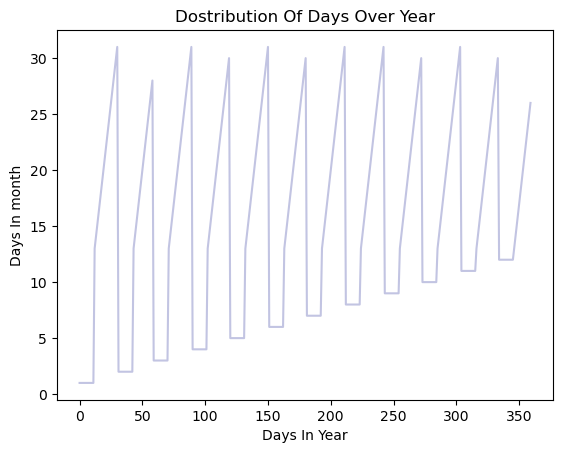

In [92]:
section = hy[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Dostribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

In [93]:
# cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",hy=hy, color="#C2C4E2")
# cyclic_month.set_title("Cyclic Encording of Month")
# cyclic_month.set_ylabel("Cosine Encode Months")
# cyclic_month.set_xlabel("Sine Encoded Months")

In [94]:
# cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',hy=hy, color="#C2C4E2")
# cyclic_day.set_title("Cyclic Encording of Day")
# cyclic_day.set_ylabel("Cosine Encode Day")
# cyclic_day.set_xlabel("Sine Encoded Day")

In [95]:
s = (hy.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [96]:
for i in object_cols:
    print(i, hy[i].isnull().sum())

Location 25
WindGustDir 29
WindDir9am 90
WindDir3pm 36
RainToday 27
RainTomorrow 27


In [97]:
for i in object_cols:
    hy[i].fillna(hy[i].mode()[0], inplace=True)

In [98]:
t = (hy.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['Date.1', 'MO', 'YEAR', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'month', 'month_sin', 'month_cos', 'day', 'day_sin', 'day_cos']


In [99]:
for i in num_cols:
    print(i, hy[i].isnull().sum())

Date.1 25
MO 25
YEAR 25
MinTemp 25
MaxTemp 25
Rainfall 27
Evaporation 390
Sunshine 390
WindGustSpeed 29
WindSpeed9am 25
WindSpeed3pm 25
Humidity9am 25
Humidity3pm 25
Pressure9am 25
Pressure3pm 25
Cloud9am 262
Cloud3pm 256
Temp9am 25
Temp3pm 25
Year 25
month 25
month_sin 25
month_cos 25
day 25
day_sin 25
day_cos 25


In [100]:
for i in num_cols:
    hy[i].fillna(hy[i].median(), inplace=True)

hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Date.1         390 non-null    float64       
 2   MO             390 non-null    float64       
 3   YEAR           390 non-null    float64       
 4   Location       390 non-null    object        
 5   MinTemp        390 non-null    float64       
 6   MaxTemp        390 non-null    float64       
 7   Rainfall       390 non-null    float64       
 8   Evaporation    0 non-null      float64       
 9   Sunshine       0 non-null      float64       
 10  WindGustDir    390 non-null    object        
 11  WindGustSpeed  390 non-null    float64       
 12  WindDir9am     390 non-null    object        
 13  WindDir3pm     390 non-null    object        
 14  WindSpeed9am   390 non-null    float64       
 15  WindSpeed3pm   390 non-

In [101]:
label_encoder = LabelEncoder()
for i in object_cols:
    hy[i] = label_encoder.fit_transform(hy[i])

hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Date.1         390 non-null    float64       
 2   MO             390 non-null    float64       
 3   YEAR           390 non-null    float64       
 4   Location       390 non-null    int32         
 5   MinTemp        390 non-null    float64       
 6   MaxTemp        390 non-null    float64       
 7   Rainfall       390 non-null    float64       
 8   Evaporation    0 non-null      float64       
 9   Sunshine       0 non-null      float64       
 10  WindGustDir    390 non-null    int32         
 11  WindGustSpeed  390 non-null    float64       
 12  WindDir9am     390 non-null    int32         
 13  WindDir3pm     390 non-null    int32         
 14  WindSpeed9am   390 non-null    float64       
 15  WindSpeed3pm   390 non-

In [102]:
features = hy.drop(['RainTomorrow', 'Date', 'day', 'month'], axis=1) # dropping target and extra columns

target = hy['RainTomorrow']

#   Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Date.1,390.0,1.004716e-16,1.001285,-1.731915,-0.791836,0.030733,0.853303,1.793382
MO,390.0,-5.840058e-16,1.001285,-1.664826,-0.765958,0.132909,0.732155,1.631022
YEAR,390.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Location,390.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MinTemp,390.0,-9.199194e-16,1.001285,-3.690474,-0.466607,0.228640,0.594820,2.356443
MaxTemp,390.0,-2.314673e-15,1.001285,-2.713924,-0.713053,0.076455,0.637359,2.744284
Rainfall,390.0,1.688108e-16,1.001285,-0.375773,-0.375773,-0.375773,-0.261947,7.819726
Evaporation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustDir,390.0,8.597112e-17,1.001285,-2.116464,-0.776132,0.117422,0.787588,1.234365


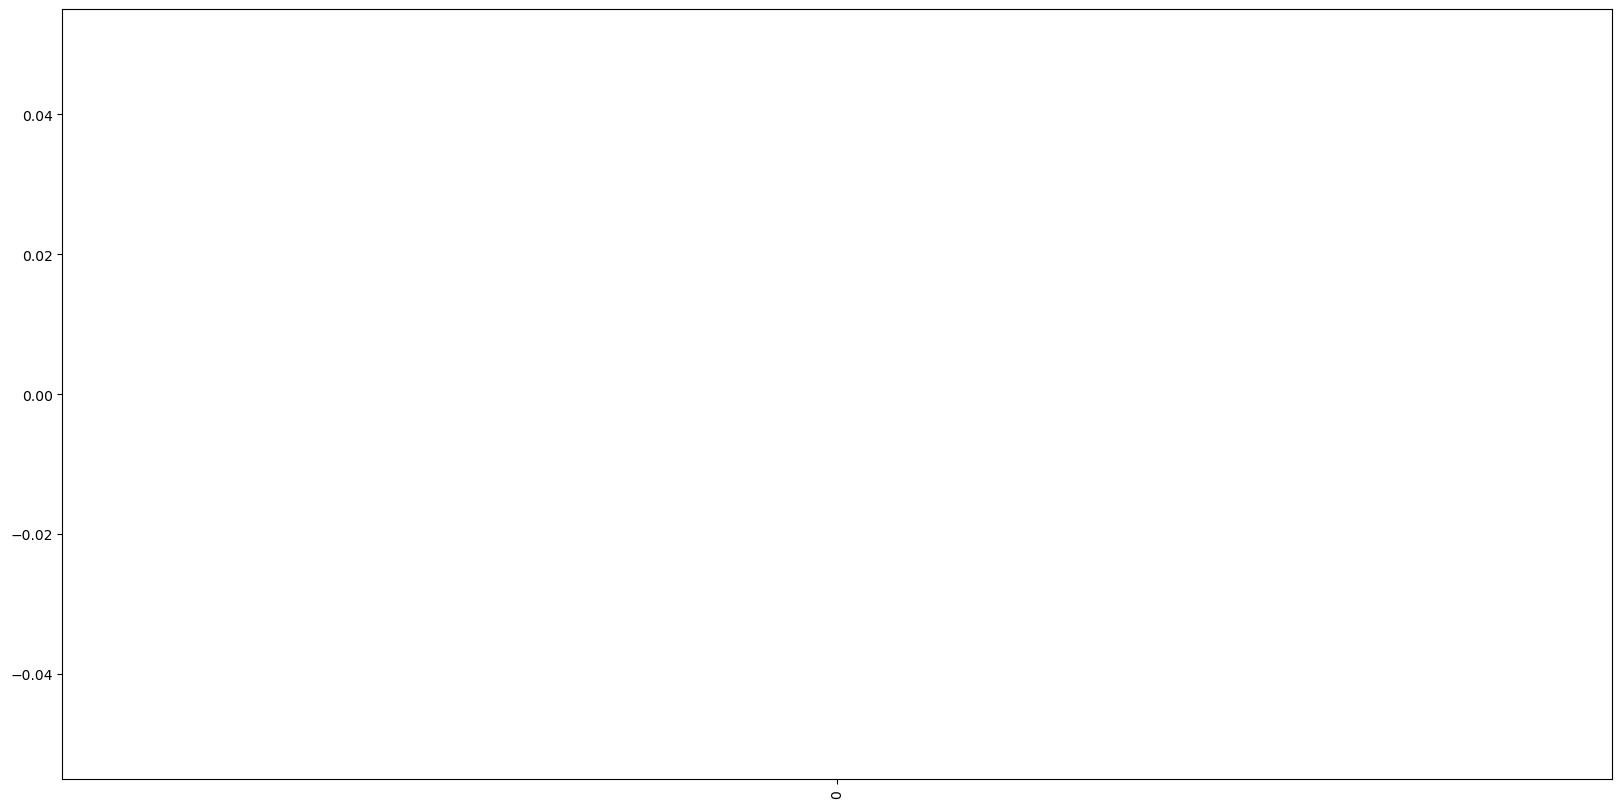

In [103]:
colours = ["#D0DBEE", "#C2C4E2","#EED4E5","#D1E6DC","#BDE2E2"]
plt.figure(figsize=(20, 10))
sns.boxenplot(hy = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [104]:
features["RainTomorrow"]=target

#   Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]<2.2)]
features = features[(features["Pressure9am"]<2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]<2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.shape

(0, 30)

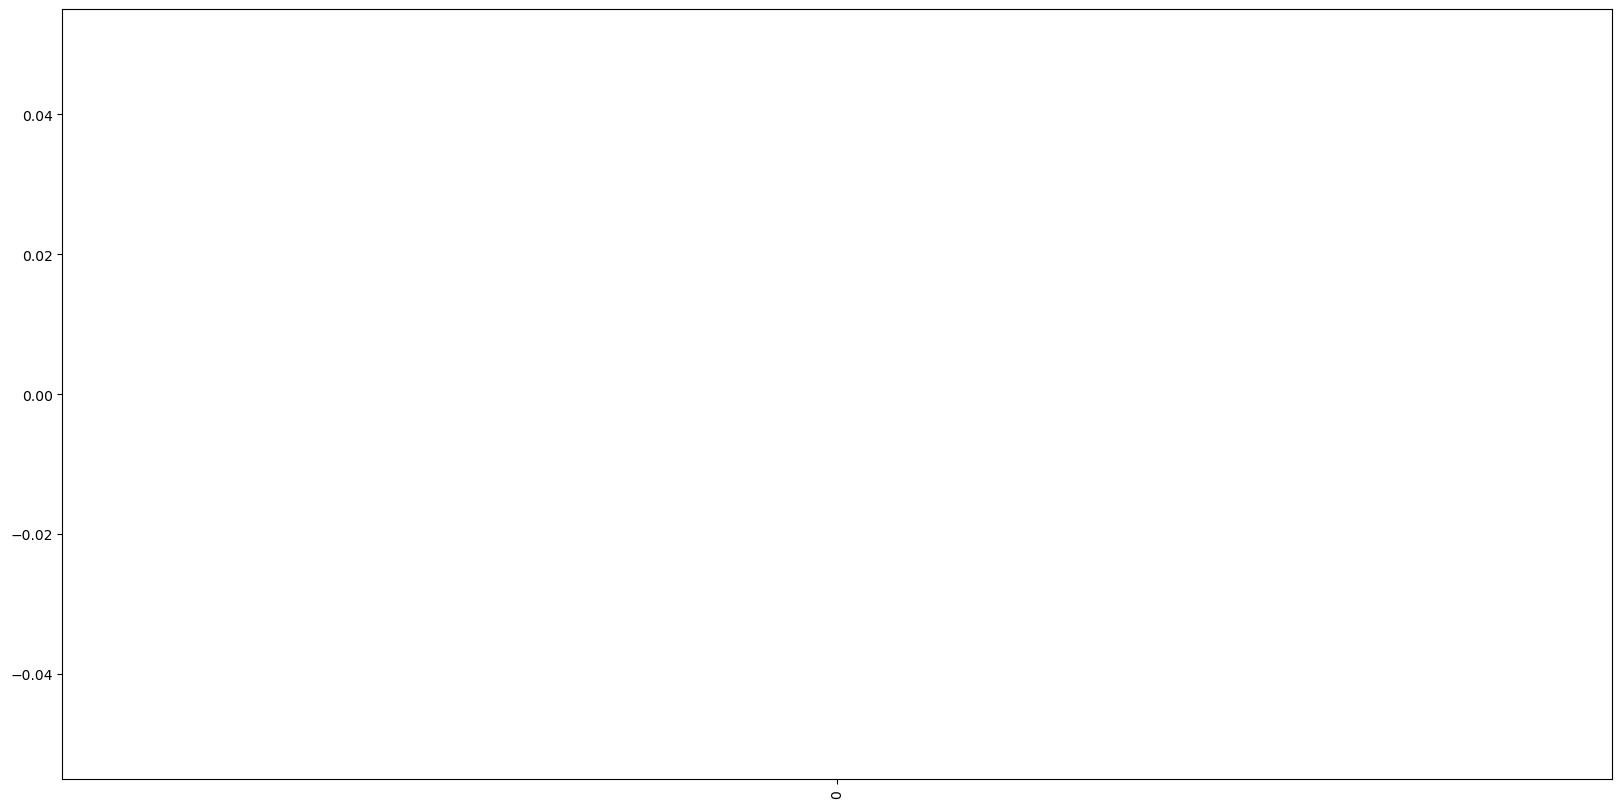

In [105]:
plt.figure(figsize=(20,10))
sns.boxenplot(hy = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [106]:
# x = features.drop(["RainTomorrow"], axis=1)
# y = features["RainTomorrow"]

# #   Splitting test and training sets
# X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# x.shape

In [107]:
# #   Early stopping
# early_stopping = callbacks.EarlyStopping(
#     min_delta = 0.001, #  Minimum amount of change to count as an improvement
#     patience=20, #  How many epochs to wait before stopping
#     restore_best_weights=True,
# )

# #  Initialising the NN
# model = Sequential()

# #  Layers

# model.add(Dense(units=32,kernel_initializer="uniform", activation='relu', input_dim = 26))
# model.add(Dense(units=32,kernel_initializer='uniform', activation='relu'))
# model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = 1, kernel_initializer='uniform',activation='sigmoid'))

# #  Compling the ANN
# opt = Adam(learning_rate=0.00009)
# model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# #  Train the ANN
# history = model.fit(X_train, y_train, batch_size = 32,epochs = 150, callbacks=[early_stopping],
# validation_split=0.2)

In [108]:
# history_df = pd.DataFrame(history.history)

# plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
# plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc="best")

# plt.show()

In [109]:
# history_df = pd.DataFrame(history.history)

# plt.plot(history_df.loc[:,['accuracy']],"#BDE2E2", label='Training accuracy')
# plt.plot(history_df.loc[:,['val_accuracy']], "#C2C4E2", label='Validation accuracy')

# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [110]:
# #  Predicting the test set results
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5)

In [111]:
# #  Confusion matrix
# cmap1 = sns.diverging_palette(260, -10,s=50, l=75, n=5,as_cmap=True)
# plt.subplots(figsize=(12,8))
# cf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap1,annot=True, annot_kws={'size':15})

In [112]:
# print(classification_report(y_test,y_pred))

# END